In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
file_path = '/content/model.xlsx'
df = pd.read_excel(file_path)









In [2]:
# Define the predictor variables (X) and the target variable (y)
X = df.drop(columns=['LSF'])
y = df['LSF']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data before applying PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)



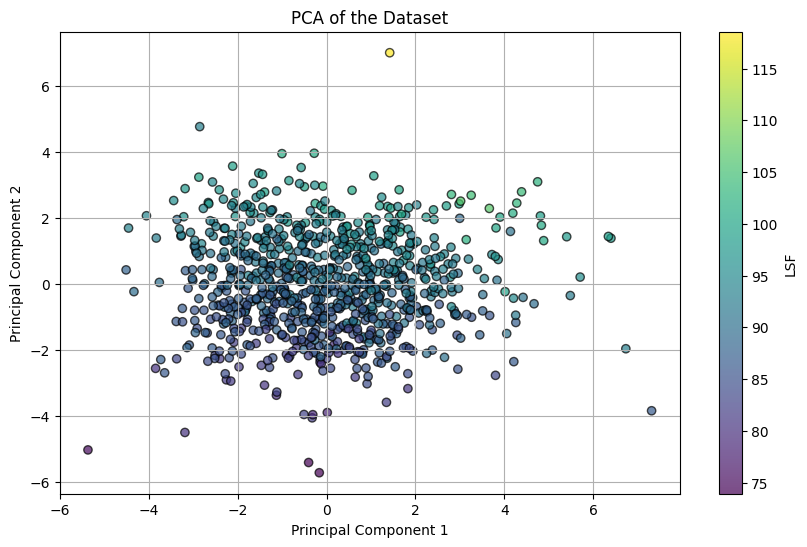

Explained variance ratio by PCA components: [0.28973432 0.19193898]


In [3]:
# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 components for simplicity
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['LSF'] = y.values

# Plot the PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['LSF'], cmap='viridis', edgecolor='k', alpha=0.7)
plt.colorbar(label='LSF')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of the Dataset')
plt.grid(True)
plt.show()

# Print explained variance
print("Explained variance ratio by PCA components:", pca.explained_variance_ratio_)



In [4]:
# Split the PCA-transformed data into training and testing sets
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train a regression model on the PCA-transformed data
model_pca = LinearRegression()
model_pca.fit(X_train_pca, y_train)

# Predict on the test set
y_pred_pca = model_pca.predict(X_test_pca)





In [5]:
# Evaluate the model
mse_pca = mean_squared_error(y_test, y_pred_pca)
r2_pca = r2_score(y_test, y_pred_pca)

print(f"PCA Model Mean Squared Error (MSE): {mse_pca}")
print(f"PCA Model R-squared (R²): {r2_pca}")

PCA Model Mean Squared Error (MSE): 4.025132099056469
PCA Model R-squared (R²): 0.8046066192924605


In [ ]:
# Function to predict using user input and display whether it is good or not
def predict_user_input():
    # Prompt user for input values
    user_input = {}
    for feature in X.columns:
        user_input[feature] = float(input(f"Enter value for {feature}: "))

    # Convert user input to DataFrame
    user_input_df = pd.DataFrame([user_input])

    # Impute missing values using the mean of each column (if any)
    user_input_imputed = imputer.transform(user_input_df)

    # Standardize the features
    user_input_scaled = scaler.transform(user_input_imputed)

    # Apply PCA
    user_input_pca = pca.transform(user_input_scaled)

    # Make prediction
    prediction = model.predict(user_input_pca)[0]

    # Determine if the prediction is good or not
    threshold = 92  # Define your threshold here
    if 92 <= prediction <= 96:
        result = "good strength"
    else:
        result = "need to improve"

    # Display the prediction and whether it is good or not
    print(f"Predicted LSF value: {prediction}")
    print(f"This LSF value is considered {result}.")

# Example usage
predict_user_input()